In [5]:
import pandas as pd
import statistics as st

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from tabulate import tabulate

Read the dataset

In [13]:
df=pd.read_csv('DS1_C5_S5_Hotel Dataset (1).csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,05-07-2015
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,NaN,0,Transient,98.00,0,1,Check-Out,04-07-2015
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,153.00,1,0,Check-Out,05-07-2015
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,NaN,0,Transient,94.71,0,0,Check-Out,04-07-2015
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,NaN,0,Transient,117.81,1,2,Check-Out,10-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,City Hotel,0,15,2017,August,34,25,2,2,2,...,No Deposit,14.0,NaN,0,Transient,132.53,0,2,Check-Out,29-08-2017
2093,City Hotel,0,83,2017,August,35,28,1,3,1,...,No Deposit,14.0,NaN,0,Transient,147.68,0,0,Check-Out,01-09-2017
2094,City Hotel,0,189,2017,August,35,29,0,3,2,...,No Deposit,42.0,NaN,0,Transient,80.10,0,1,Check-Out,01-09-2017
2095,City Hotel,0,147,2017,August,35,28,1,5,2,...,No Deposit,14.0,NaN,0,Transient,117.00,0,1,Check-Out,03-09-2017


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           2097 non-null   object 
 1   is_canceled                     2097 non-null   int64  
 2   lead_time                       2097 non-null   int64  
 3   arrival_date_year               2097 non-null   int64  
 4   arrival_date_month              2097 non-null   object 
 5   arrival_date_week_number        2097 non-null   int64  
 6   arrival_date_day_of_month       2097 non-null   int64  
 7   stays_in_weekend_nights         2097 non-null   int64  
 8   stays_in_week_nights            2097 non-null   int64  
 9   adults                          2097 non-null   int64  
 10  children                        2097 non-null   int64  
 11  babies                          2097 non-null   int64  
 12  meal                            20

In [21]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,05-07-2015
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,NaN,0,Transient,98.00,0,1,Check-Out,04-07-2015
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,153.00,1,0,Check-Out,05-07-2015
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,NaN,0,Transient,94.71,0,0,Check-Out,04-07-2015
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,NaN,0,Transient,117.81,1,2,Check-Out,10-07-2015


In [17]:
df.shape

(2097, 32)

In [19]:
df.isnull().sum()

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                              0
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                              127
company                           2066
days_in_waiting_list     

In [344]:
df['agent']=df['agent'].fillna(0.0)
df['company']=df['company'].fillna(0.0)

In [346]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

Filled the missing values for company with '0.0' as heavy number of rows were missing

In [363]:
#2.a Bookings in each month through group by function
peak_period=df.groupby(['arrival_date_month'])[['arrival_date_year']].count().sort_values(['arrival_date_year'])
peak_period

,arrival_date_year
arrival_date_month,
November,68
February,73
December,82
January,90
March,150
October,159
April,181
September,185
May,258


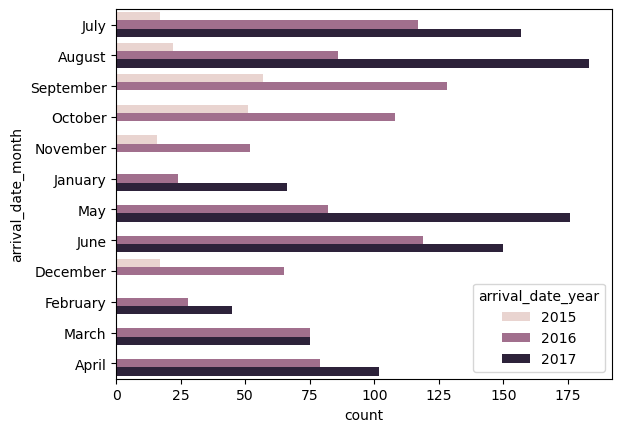

In [121]:
#2a peak period in booking through visualization
sns.countplot(y=df['arrival_date_month'],hue=df['arrival_date_year'])
plt.show()
# Number of bookings increased yearly; High bookings in the month august; Generally May - August have good number of bookings

ii) Relationship between lead time and cancellation

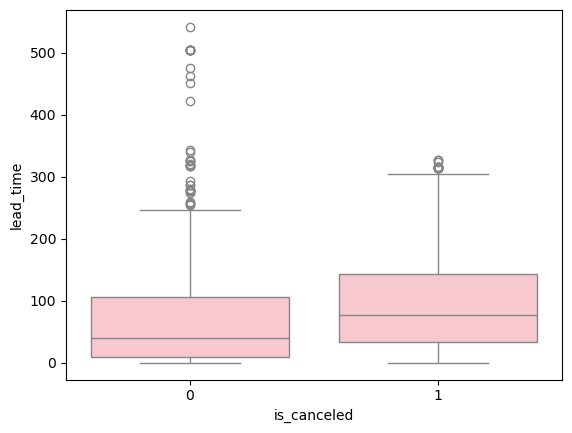

In [71]:
#2b 
sns.boxplot(y=df['lead_time'],x=df['is_canceled'],color='pink')
plt.show()
# Outliers are very few in cancelled category; Meaning not much cusomers who cancelled booking have high lead time; 
#Implies that lead time doesnt affect much the cancellation of booking

iii) Booking patterns

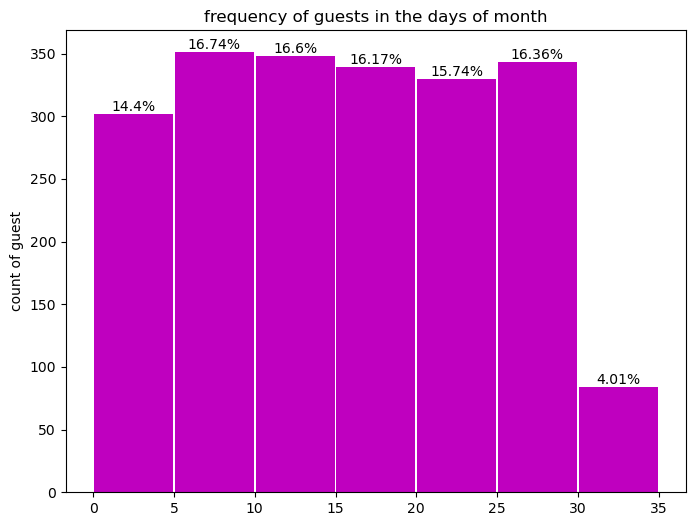

In [79]:
#Booking pattern by day of month
fig,ax=plt.subplots(1,figsize=(8,6))
plt.hist(df['arrival_date_day_of_month'],bins=[0,5,10,15,20,25,30,35],rwidth=0.98,color='m')
plt.ylabel('count of guest')
plt.title('frequency of guests in the days of month')
for bar in ax.patches:
    prcn=f'{round(100*bar.get_height()/len(df),2)}%'
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(prcn,(x,y),va='bottom',ha='center')
plt.show()


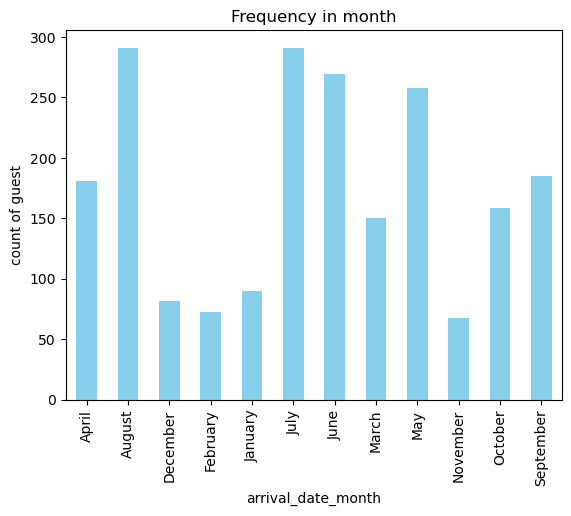

In [33]:
# booking pattern in month
df['arrival_date_month'].value_counts().sort_index().plot(kind='bar',color='skyblue')
plt.title('Frequency in month')
plt.ylabel('count of guest')
plt.show()

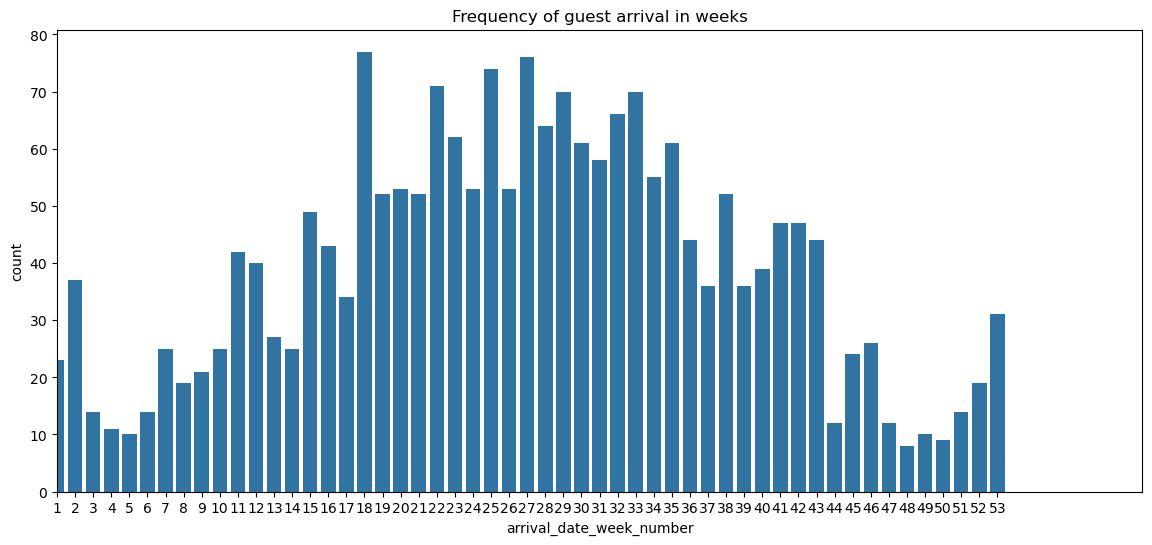

In [69]:
# booking pattern in the week of the years
fig,ax=plt.subplots(1,figsize=(14,6))
sns.countplot(x=df['arrival_date_week_number'])
plt.title('Frequency of guest arrival in weeks')
plt.xlim(0,60)
plt.show()
# Day in Month: guest visit hotel little less in the 1st week of the month
# Month: Customers are high in May - August with reaching its peak in August
# Week of year: heavy rise in number of guest after 18th week till 35th week

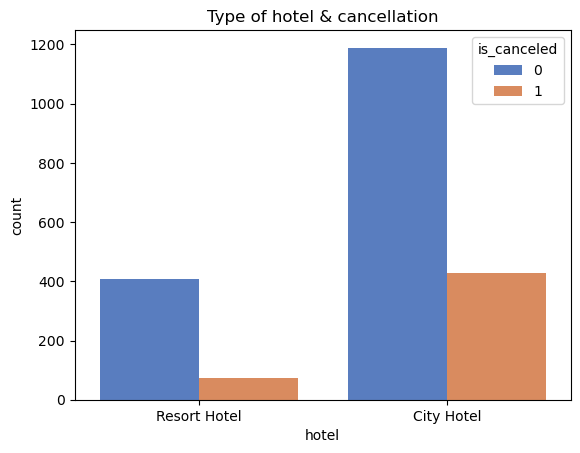

In [374]:
#3a Hotel type
sns.countplot(x=df['hotel'],hue=df['is_canceled'])
plt.title('Type of hotel & cancellation')
plt.show()

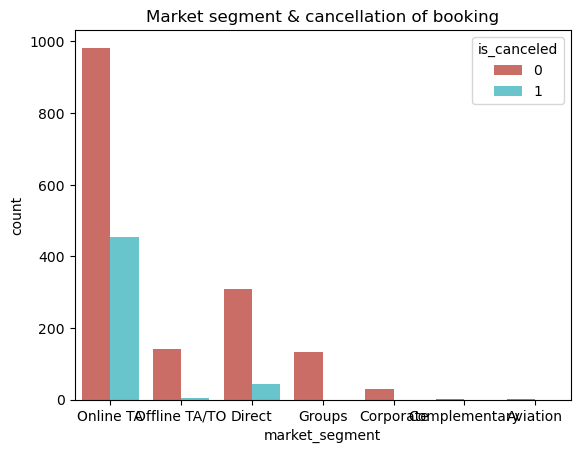

In [378]:
#3a Market segment
sns.countplot(x=df['market_segment'],hue=df['is_canceled'],palette='hls')
plt.title('Market segment & cancellation of booking')
plt.show()

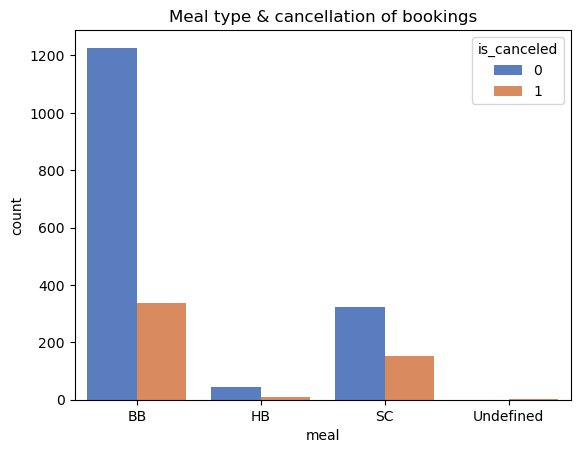

In [376]:
#3a Meal
sns.countplot(x=df['meal'],hue=df['is_canceled'])
plt.title('Meal type & cancellation of bookings')
plt.show()
# Hotel: More than one forth of the customers who book city hotel end up cancelling while less than one fifth of the customers who book resort cancels
#Market segment: one-third of online customers cancels their booking; while corprate, aviation and complementary dont cancel their bookings
# Meal: one-third of Sc type meal preferrer end up cancelling the bookings

ii) pattern in cancellations over time

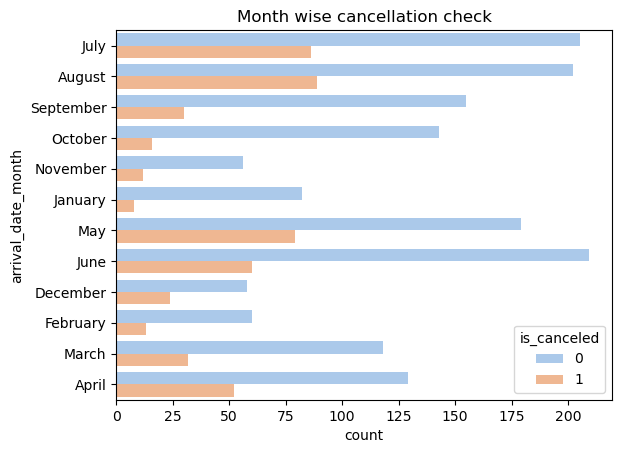

In [381]:
#3b Month wise analyse
sns.countplot(y=df['arrival_date_month'],hue=df['is_canceled'],palette='pastel')
plt.title('Month wise cancellation check')
plt.show()

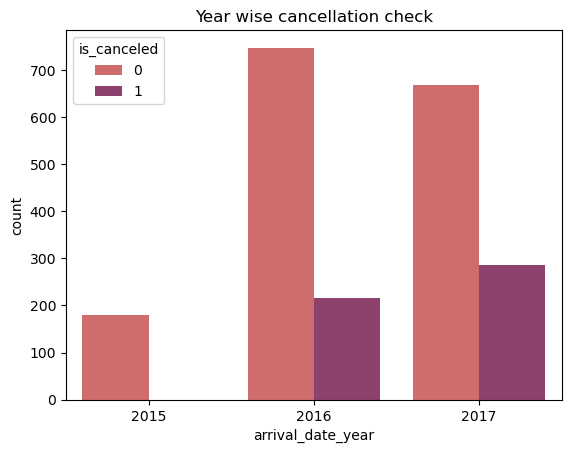

In [384]:
#3b Year wise check
sns.countplot(x=df['arrival_date_year'],hue=df['is_canceled'],palette='flare')
plt.title('Year wise cancellation check')
plt.show()
#Month: May has high number of cancellations followed in May by july & august; less cancellations in January
#Year: 2017 has highest cancellation of almost one third of reservation & 2015 has no cancellation 

iii) high risk bookings that are more likely to be cancelled

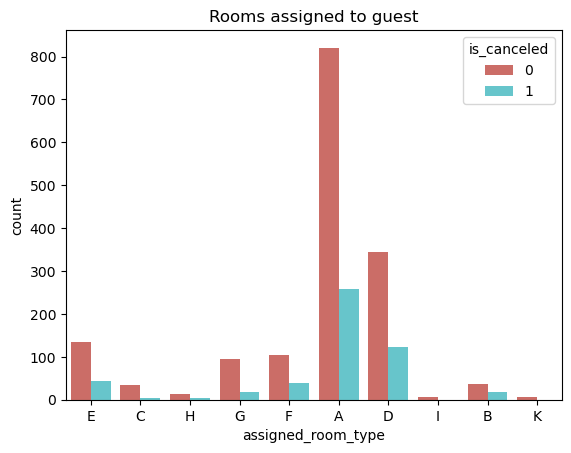

In [387]:
#3c
sns.countplot(x=df['assigned_room_type'],hue=df['is_canceled'],palette='hls')
plt.title('Rooms assigned to guest')
plt.show()

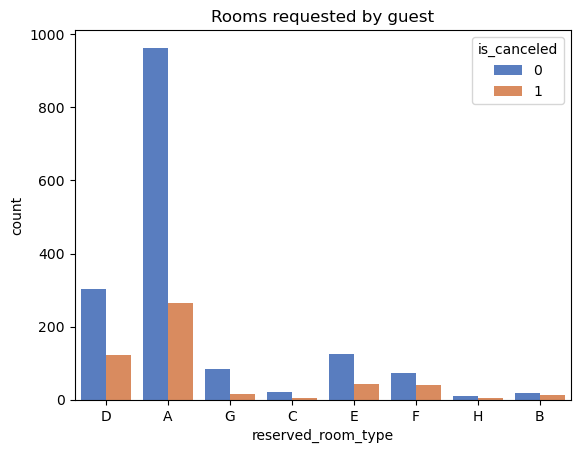

In [389]:
#3c
sns.countplot(x=df['reserved_room_type'],hue=df['is_canceled'])
plt.title('Rooms requested by guest')
plt.show()

In [393]:
# filter the data set for agents who are incharge for cancelled guests
df_agn=df[df['agent'].isin([9.0,240.0,14.0,195.0,250.0,7.0])]
df_agn

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,amount
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,240.0,0.0,0,Transient,97.00,0,3,Check-Out,05-07-2015,388.00
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,240.0,0.0,0,Transient,153.00,1,0,Check-Out,05-07-2015,306.00
6,Resort Hotel,0,98,2015,July,28,6,1,1,2,...,240.0,0.0,0,Transient,87.30,1,1,Check-Out,08-07-2015,174.60
8,Resort Hotel,0,10,2015,July,28,10,0,1,2,...,250.0,0.0,0,Transient,131.00,0,0,Check-Out,11-07-2015,131.00
9,Resort Hotel,0,42,2015,July,29,13,1,2,2,...,240.0,0.0,0,Transient,110.00,1,0,Check-Out,16-07-2015,330.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,City Hotel,0,52,2017,August,35,27,1,0,1,...,9.0,0.0,0,Transient,140.00,0,1,Check-Out,28-08-2017,140.00
2092,City Hotel,0,15,2017,August,34,25,2,2,2,...,14.0,0.0,0,Transient,132.53,0,2,Check-Out,29-08-2017,530.12
2093,City Hotel,0,83,2017,August,35,28,1,3,1,...,14.0,0.0,0,Transient,147.68,0,0,Check-Out,01-09-2017,590.72
2095,City Hotel,0,147,2017,August,35,28,1,5,2,...,14.0,0.0,0,Transient,117.00,0,1,Check-Out,03-09-2017,702.00


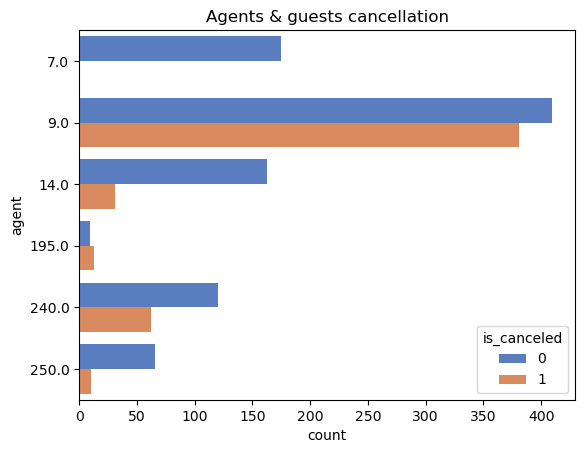

In [395]:
#3c
sns.countplot(y=df_agn['agent'],hue=df_agn['is_canceled'])
plt.title('Agents & guests cancellation')
plt.show()

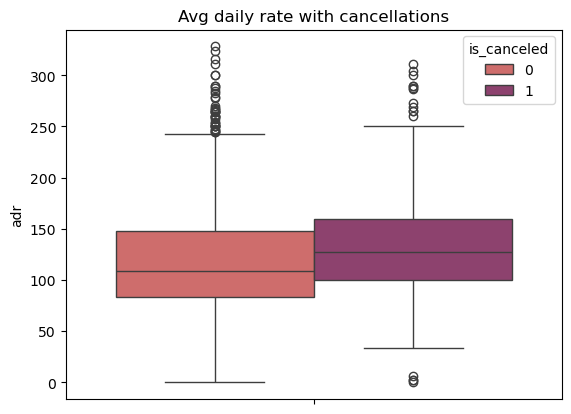

In [397]:
#3c
sns.boxplot(y=df['adr'],hue=df['is_canceled'],palette='flare')
plt.title('Avg daily rate with cancellations')
plt.show()
# Rooms: customers who have been assigned room D, F and B have cancelled mostly compare to others
# Almost half the customers booked by agent '9.0' end up cancelling the booking while no one cancels who are under agent '7.0'
# highest outlier of adr is in customers who haven't cancelled their bookings; implies, highest paying customers doesnt cancel

i) Pattern in lead time, special request made or room preferences

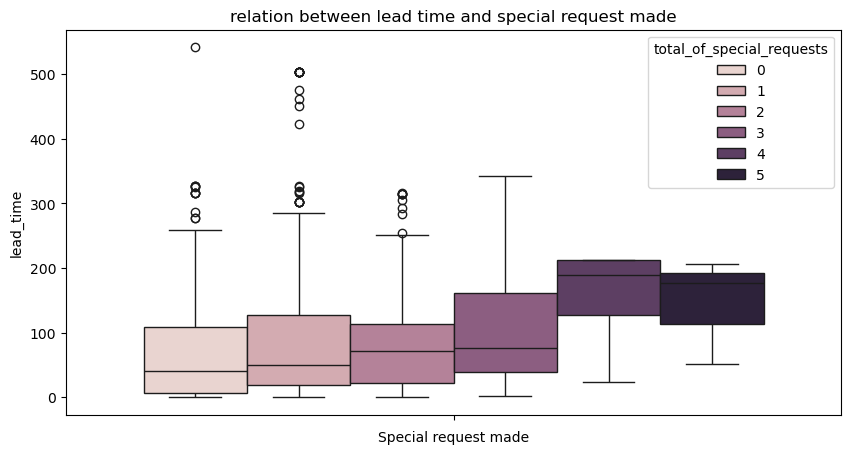

In [21]:
#4a
fig,ax=plt.subplots(1,figsize=(10,5))
sns.boxplot(y=df['lead_time'],hue=df['total_of_special_requests'])
plt.title('relation between lead time and special request made')
plt.xlabel('Special request made')
plt.show()

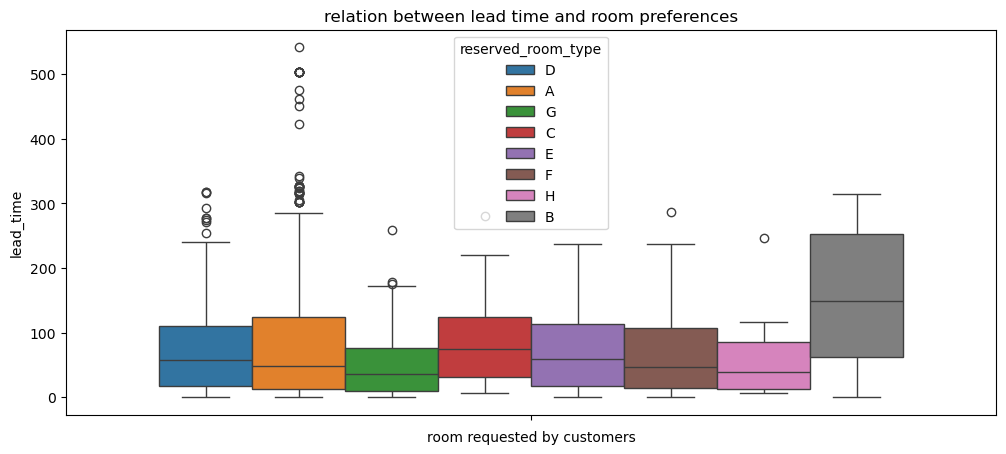

In [25]:
#4a
fig,ax=plt.subplots(1,figsize=(12,5))
sns.boxplot(y=df['lead_time'],hue=df['reserved_room_type'])
plt.title('relation between lead time and room preferences')
plt.xlabel('room requested by customers')
plt.show()
# Spl request: Guest with highest lead time made no special request; the guest having high lead time make 1/2 request 
#   while 4 to 5 requests are made by guest having leadtime around 50 -150
# Room requested: Customers who have requested room A have the longest lead time; it is seen from outliers for room A; 
#   otherwise, guest requesting remaining rooms has similar lead time

ii) Most effective marketing channels 

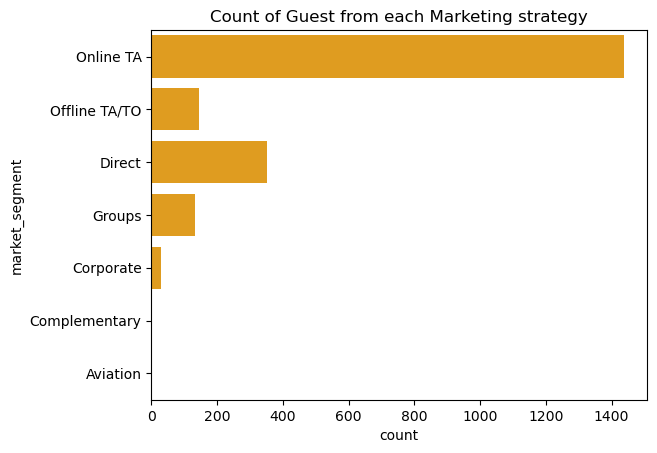

In [413]:
#4b
sns.countplot(df['market_segment'],color='orange')
plt.title('Count of Guest from each Marketing strategy')
plt.show()
# Online & direct customers are high in count compared to rest

iii) Market strategy with lead time, previous cancellation and special requests made by guest

In [80]:
#4c spl request made
df.groupby(['market_segment','total_of_special_requests'])[['total_of_special_requests']].count()

total_of_special_requests
market_segment total_of_special_requests                           
Aviation       0                                                  1
Complementary  0                                                  1
Corporate      0                                                 17
               1                                                 12
Direct         0                                                225
               1                                                 70
               2                                                 45
               3                                                 10
               4                                                  1
               5                                                  1
Groups         0                                                 69
               1                                                 43
               2                                                 19
               3                                                  1
Offline TA/TO  0                                                 84
               1                                                 54
               2                                                  5
               3                                                  2
Online TA      0                                                528
               1                                                643
               2                                                213
               3                                                 44
               4                                                  7
               5                                                  2

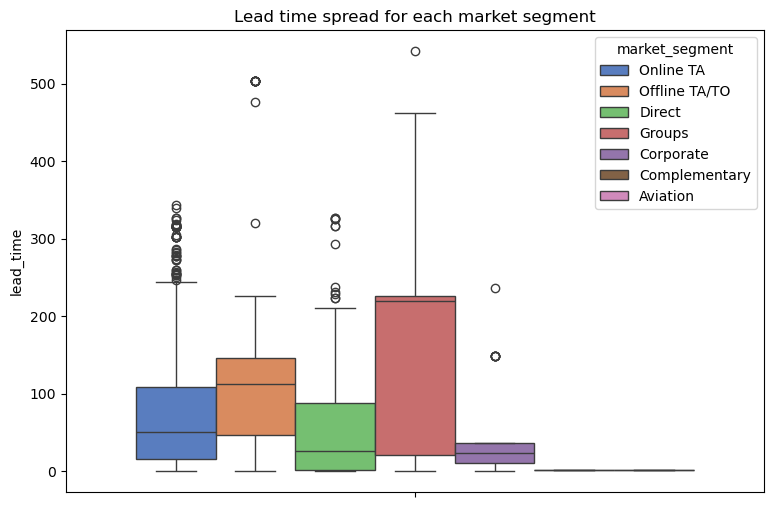

In [411]:
#4c lead time
fig,ax=plt.subplots(1,figsize=(9,6))
sns.boxplot(y=df['lead_time'],hue=df['market_segment'])
sns.set_palette('muted')
plt.title('Lead time spread for each market segment')
plt.show()
# Online & direct customers make 4 to 5 special request
# No one has made cancellation previously
# Lead time spread is high for group customers followed by customers who booked online; while very low for corporate

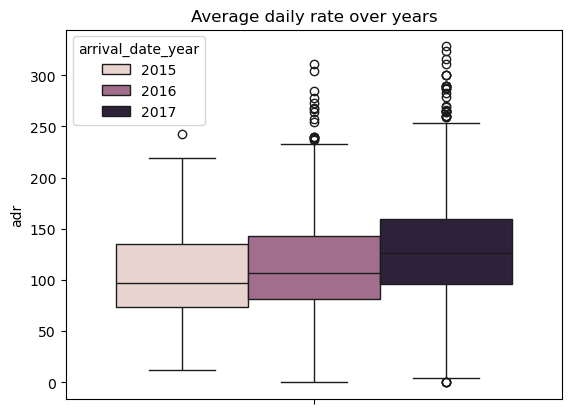

In [435]:
#5a
sns.boxplot(y=df['adr'],hue=df['arrival_date_year'])
plt.title('Average daily rate over years')
plt.show()

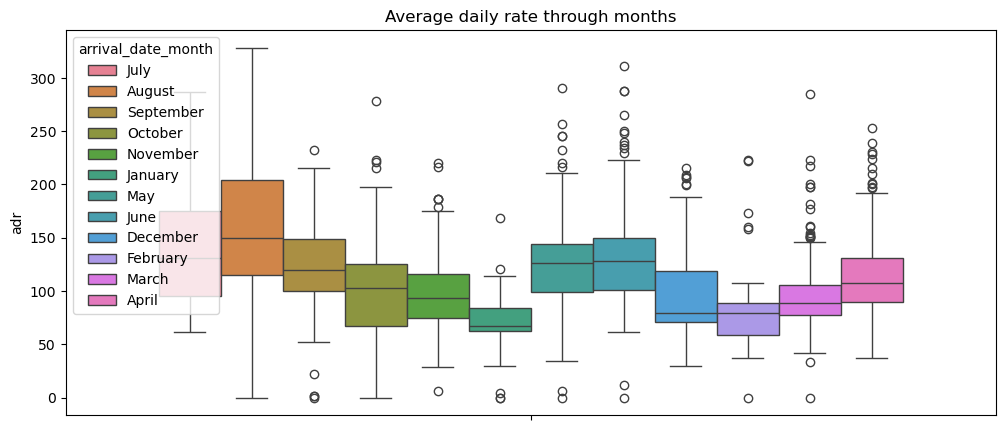

In [102]:
fig,ax=plt.subplots(1,figsize=(12,5))
sns.boxplot(y=df['adr'],hue=df['arrival_date_month'])
plt.title('Average daily rate through months')
plt.show()
# adr has increased on yearly basis; the range of avg daily rate been shifted a little above compared to previous years; implying, rate has been gradually increased
# August has wide spread of adr & range is in higher amount; Adr can go to 300 steadily in August & MAy moth; while adr range in lower side for Jan & Feb

ii) pricing strategies that maximize revenue

iii) Rooms with higher average daily rate

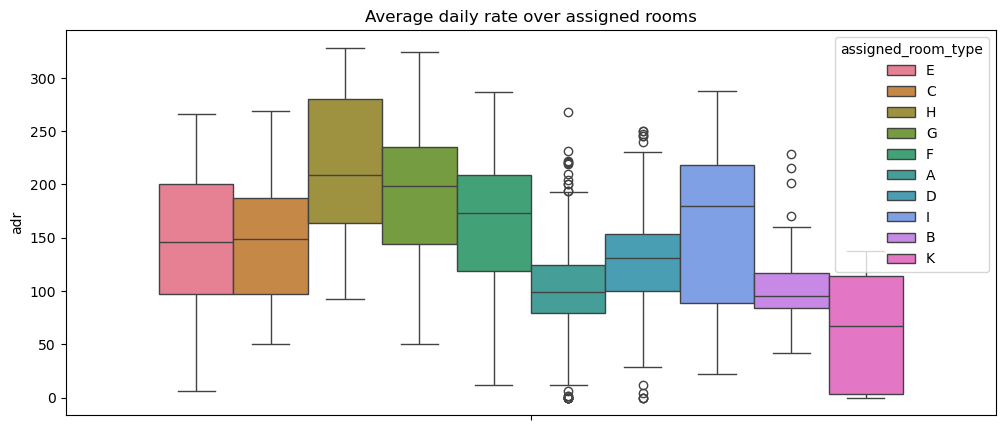

In [110]:
fig,ax=plt.subplots(1,figsize=(12,5))
sns.boxplot(y=df['adr'],hue=df['assigned_room_type'])
sns.set_palette('bright')
plt.title('Average daily rate over assigned rooms')
plt.show()

In [70]:
# Rooms requested by customers & rooms that are assigned
df.groupby(['reserved_room_type','assigned_room_type'])[['adr']].mean()

adr
reserved_room_type assigned_room_type            
A                  A                   102.443662
                   B                   106.910417
                   C                   120.885625
                   D                    92.671605
                   E                   103.618000
                   F                   123.131333
                   G                   124.620000
                   I                    66.503333
                   K                    74.480000
B                  B                   104.705000
C                  C                   167.720500
                   I                   205.776667
D                  A                   127.724167
                   D                   135.494156
                   E                   111.850000
                   F                   134.200000
                   G                   173.105000
                   K                    33.500000
E                  A                   146.000000
                   D                   119.970000
                   E                   157.068759
                   F                   123.740000
                   G                   149.614286
F                  E                    95.400000
                   F                   180.615047
                   G                   133.663333
G                  G                   198.686211
                   H                   144.500000
                   I                   288.000000
H                  H                   225.505714

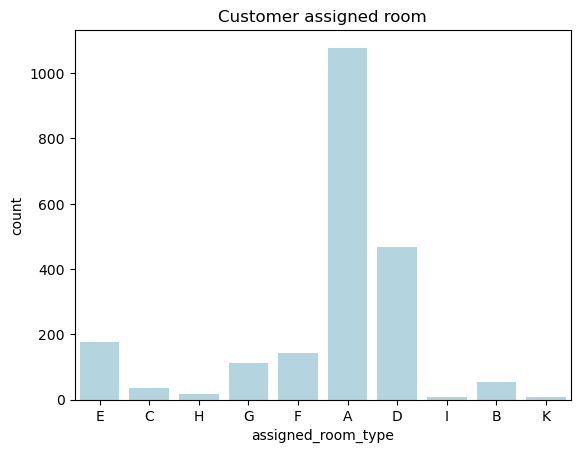

In [421]:
sns.countplot(x=df['assigned_room_type'],color='lightblue')
plt.title('Customer assigned room')
plt.show()

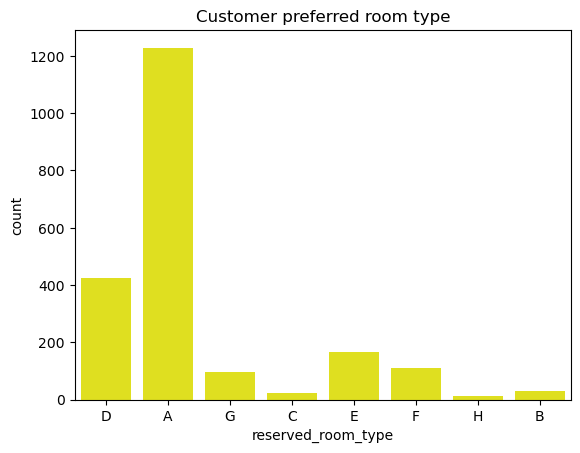

In [52]:
sns.countplot(x=df['reserved_room_type'],color='yellow')
plt.title('Customer preferred room type')
plt.show()

In [58]:
df_rm=df[df['assigned_room_type'].isin(['A','D'])]
df_rm

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,0,10,2015,July,28,10,0,1,2,...,No Deposit,250.0,NaN,0,Transient,131.00,0,0,Check-Out,11-07-2015
12,Resort Hotel,0,110,2015,July,31,28,2,8,2,...,No Deposit,6.0,NaN,0,Transient,90.95,0,1,Check-Out,07-08-2015
13,Resort Hotel,0,5,2015,August,32,8,2,1,2,...,No Deposit,241.0,NaN,0,Transient,157.59,0,1,Check-Out,11-08-2015
14,Resort Hotel,0,34,2015,August,33,9,2,2,2,...,No Deposit,240.0,NaN,0,Transient,211.00,0,1,Check-Out,13-08-2015
18,Resort Hotel,0,4,2015,September,36,2,0,4,2,...,No Deposit,240.0,NaN,0,Transient,154.25,0,0,Check-Out,06-09-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,City Hotel,0,52,2017,August,35,27,1,0,1,...,No Deposit,9.0,NaN,0,Transient,140.00,0,1,Check-Out,28-08-2017
2092,City Hotel,0,15,2017,August,34,25,2,2,2,...,No Deposit,14.0,NaN,0,Transient,132.53,0,2,Check-Out,29-08-2017
2093,City Hotel,0,83,2017,August,35,28,1,3,1,...,No Deposit,14.0,NaN,0,Transient,147.68,0,0,Check-Out,01-09-2017
2095,City Hotel,0,147,2017,August,35,28,1,5,2,...,No Deposit,14.0,NaN,0,Transient,117.00,0,1,Check-Out,03-09-2017


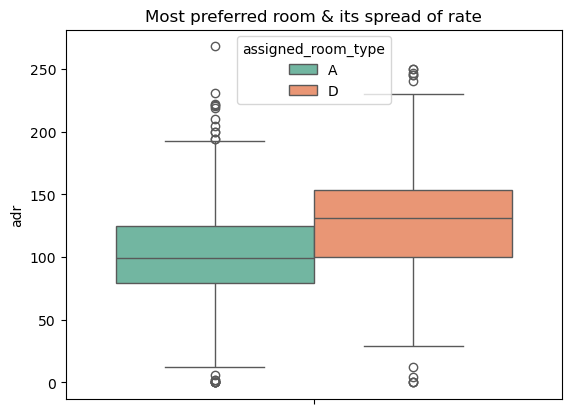

In [437]:
sns.boxplot(y=df_rm['adr'],hue=df_rm['assigned_room_type'],palette='Set2')
plt.title('Most preferred room & its spread of rate')
plt.show()
#Costliest rooms: H & G are the high earning rooms, high adr rooms arent assigned; room B, K's range lie in low side of adr; 
# Most preferred: Room A & D are the most preferred, their adr is in average
# Room D has high range of adr compared to room A
# High rate rooms can be recommended & low rate rooms like B & K can be upgraded to increase the rate; 
# because it can be seen that room B & K even though less rate aren't much preferred by customers

# Task 6: Operational Efficiency

i) Effectiveness of different booking channels

In [112]:
#6a New column: 'amount' in df data frame; amount = adr*(week days stay + weekend stay days)
df['amount']=df['adr']*(df['stays_in_weekend_nights']+df['stays_in_week_nights'])
df['amount']

0       388.00
1       196.00
2       306.00
3        94.71
4       471.24
         ...  
2092    530.12
2093    590.72
2094    240.30
2095    702.00
2096    715.50
Name: amount, Length: 2097, dtype: float64

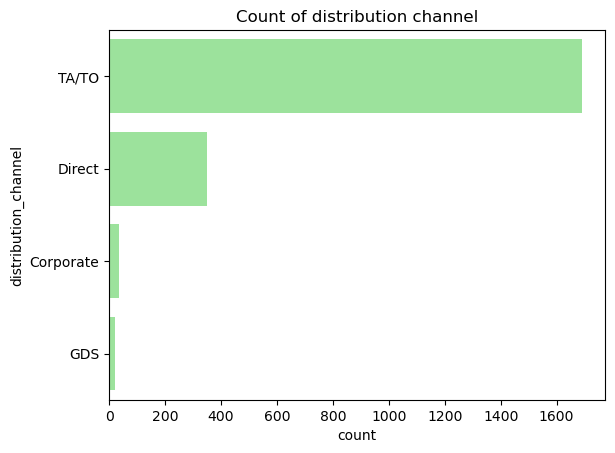

In [40]:
sns.countplot(df['distribution_channel'],color='lightgreen')
plt.title('Count of distribution channel')
plt.show()

In [154]:
df.groupby(['distribution_channel'])[['amount']].agg(['mean','min','max'])

amount               
                            mean   min      max
distribution_channel                           
Corporate             312.672000   0.0   770.00
Direct                384.503989   0.0  2177.00
GDS                   315.276818  18.0   880.00
TA/TO                 329.061095   0.0  2433.62

In [156]:
df.groupby(['distribution_channel'])[['adr']].agg(['mean','min','max'])
# Distribution is high through travel agent/tourist operator channel
# Amount wise: Travel agent/ tourist operator channel gets maximum amount paid; while in average, direct customers fetch high amount
# Avg daily rate wise: Direct customers have booked high adr rooms; on average direct customers & travel agent fetch good daily rate for hotel

adr             
                            mean  min     max
distribution_channel                         
Corporate             103.913143  0.0  159.00
Direct                139.988348  0.0  328.33
GDS                   136.946818  6.0  220.00
TA/TO                 119.673801  0.0  324.00

ii) Impact of booking changes on hotel operation

Text(0.5, 1.0, 'Booking changes wise Avg daily rate')

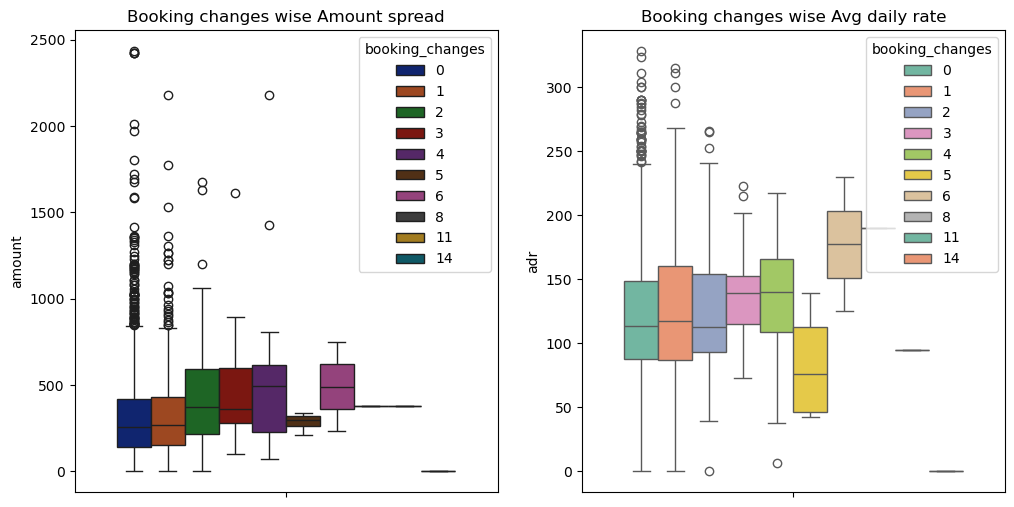

In [182]:
#6b
fig,ax=plt.subplots(1,2,figsize=(12,6))
sns.boxplot(hue=df['booking_changes'],y=df['amount'],palette='dark',ax=ax[0])
ax[0].set_title('Booking changes wise Amount spread')
sns.boxplot(hue=df['booking_changes'],y=df['adr'],palette='Set2',ax=ax[1])
ax[1].set_title('Booking changes wise Avg daily rate')
# High paying customers rarely make booking changes; 8 booking changes made customers has range of 120 - 220 adr

iii) Realtion between waiting list & likelihood of cancellation of booking

In [204]:
#6c
df.groupby(['days_in_waiting_list','is_canceled'])[['is_canceled']].count()

is_canceled
days_in_waiting_list is_canceled             
0                    0                   1571
                     1                    501
48                   0                      1
96                   0                     23
147                  0                      1

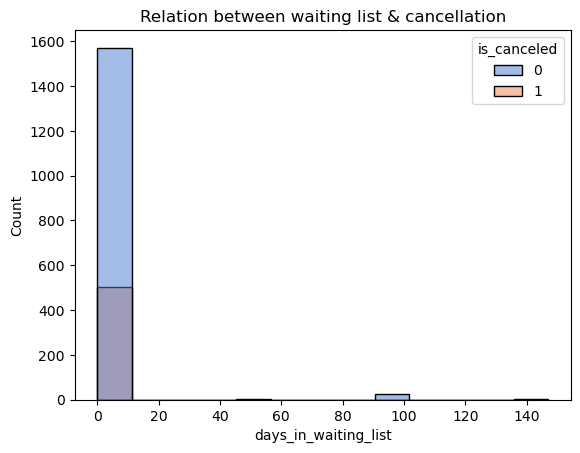

In [439]:
sns.histplot(x=df['days_in_waiting_list'],hue=df['is_canceled'])
plt.title('Relation between waiting list & cancellation')
plt.show()
# one-forth of customers who werent waiting had cancelled booking while guests who waited for 96 & 147 days havent cancel their booking
# implying that there isnt much relation between waiting list & cancellation of bookings

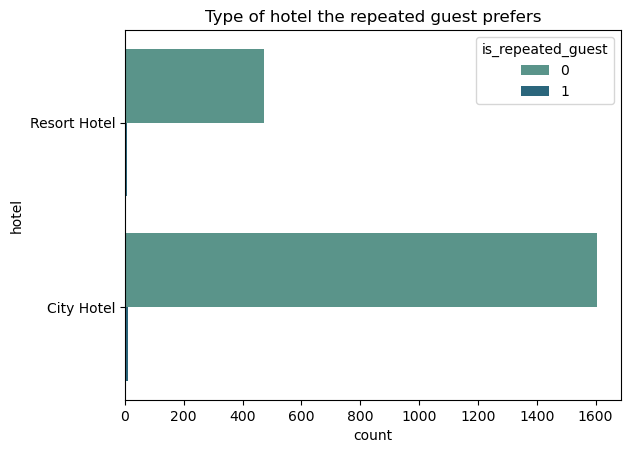

In [226]:
#7a
sns.countplot(y=df['hotel'],hue=df['is_repeated_guest'],palette='crest')
plt.title('Type of hotel the repeated guest prefers')
plt.show()

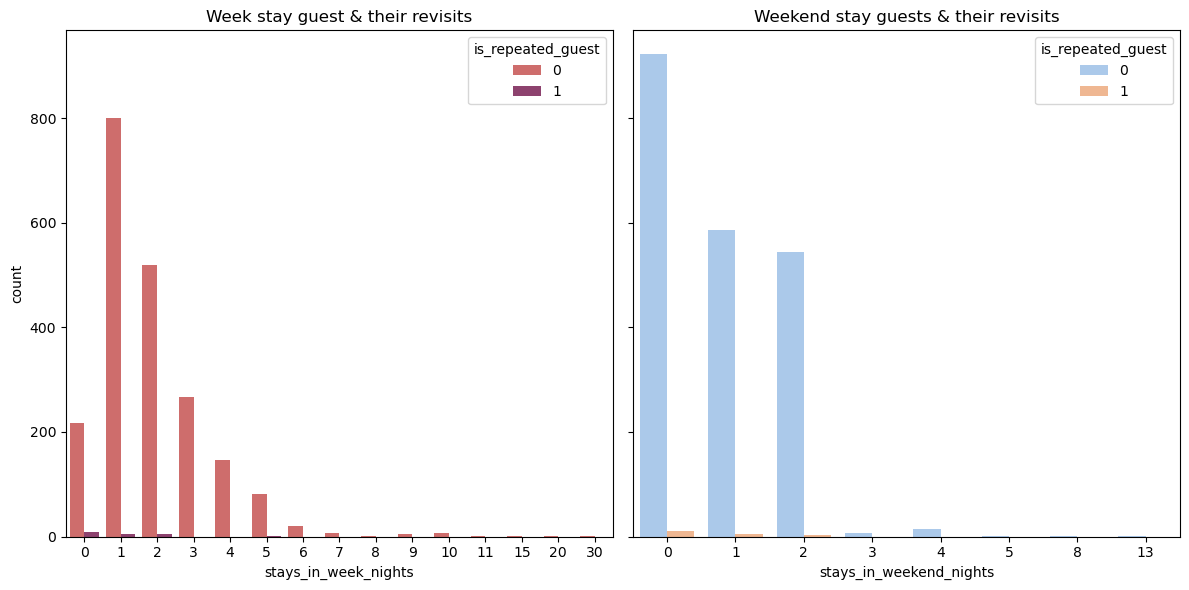

In [228]:
fig,ax=plt.subplots(1,2,figsize=(12,6),sharey=True)
sns.countplot(x=df['stays_in_week_nights'],hue=df['is_repeated_guest'],palette='flare',ax=ax[0])
ax[0].set_title('Week stay guest & their revisits')
sns.countplot(x=df['stays_in_weekend_nights'],hue=df['is_repeated_guest'],palette='pastel',ax=ax[1])
ax[1].set_title('Weekend stay guests & their revisits')
plt.tight_layout()
plt.show()
# Nature of stay doesnt impact on return of guest back to the hotel

ii) Accommodation of special request made leads to revisit?

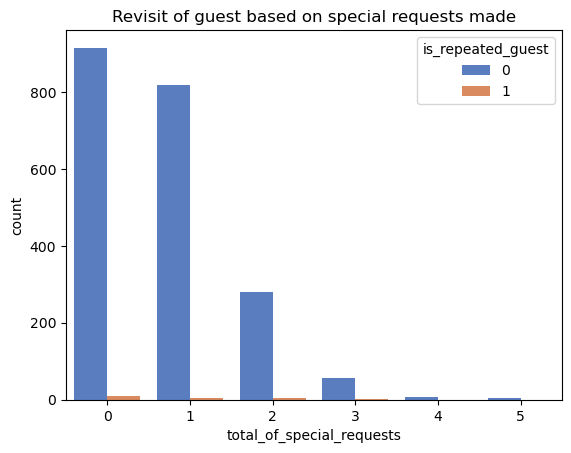

In [443]:
#7b
sns.countplot(x=df['total_of_special_requests'],hue=df['is_repeated_guest'])
plt.title('Revisit of guest based on special requests made')
plt.show()
# No difference in revisit of customers based on special request made

iii) factors contributing to revisit of customers; Distribution of lead time on basis of repeated customers

In [244]:
#7c
df_ll=df[df['is_repeated_guest']!=0]
df_ll

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,amount
108,Resort Hotel,0,49,2016,August,36,29,2,5,2,...,250.0,NaN,0,Transient,218.60,1,0,Check-Out,05-09-2016,1530.20
234,Resort Hotel,0,0,2016,July,32,31,2,2,2,...,NaN,NaN,0,Transient,237.75,0,1,Check-Out,04-08-2016,951.00
292,Resort Hotel,0,0,2016,October,42,15,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,15-10-2016,0.00
324,Resort Hotel,0,0,2017,January,2,9,1,0,2,...,306.0,NaN,0,Transient,30.99,0,0,Check-Out,10-01-2017,30.99
326,Resort Hotel,0,0,2017,January,4,25,0,1,1,...,240.0,NaN,0,Transient,4.00,0,0,Check-Out,26-01-2017,4.00
381,Resort Hotel,0,1,2017,June,22,2,0,2,2,...,241.0,NaN,0,Transient,103.00,1,1,Check-Out,04-06-2017,206.00
444,Resort Hotel,0,0,2017,August,31,4,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,04-08-2017,0.00
1034,City Hotel,0,0,2015,November,45,5,0,2,2,...,NaN,NaN,0,Transient,95.00,0,0,Check-Out,07-11-2015,190.00
1103,City Hotel,0,0,2016,March,13,26,0,1,3,...,NaN,NaN,0,Transient,135.00,0,1,Check-Out,27-03-2016,135.00
1127,City Hotel,0,23,2017,March,11,12,1,0,2,...,NaN,197.0,0,Transient,85.00,0,1,Check-Out,13-03-2017,85.00


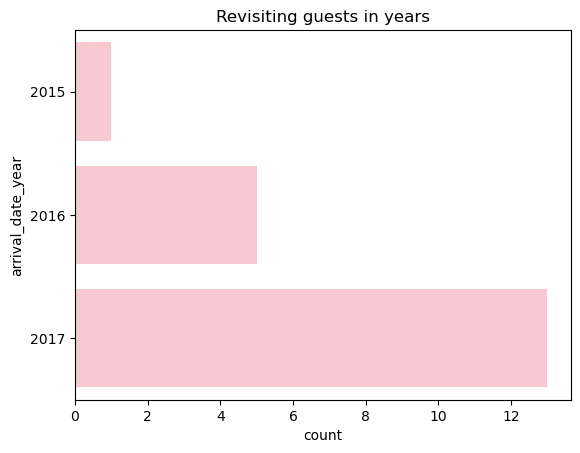

In [445]:
sns.countplot(y=df_ll['arrival_date_year'],color='pink')
plt.title('Revisiting guests in years')
plt.show()

In [264]:
# Agent & count of their revisiting guest
df_ll.groupby(['agent'])[['hotel']].count()

,hotel
agent,
7.0,1
9.0,2
14.0,2
150.0,1
152.0,1
240.0,1
241.0,1
250.0,1
306.0,1


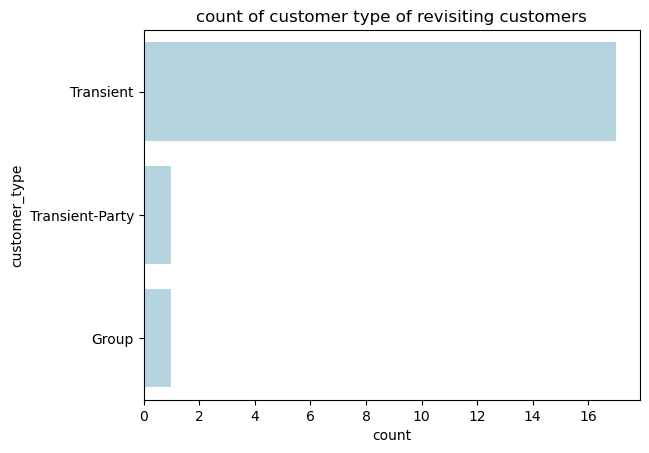

In [447]:
sns.countplot(y=df_ll['customer_type'],color='lightblue')
plt.title('count of customer type of revisiting customers')
plt.show()

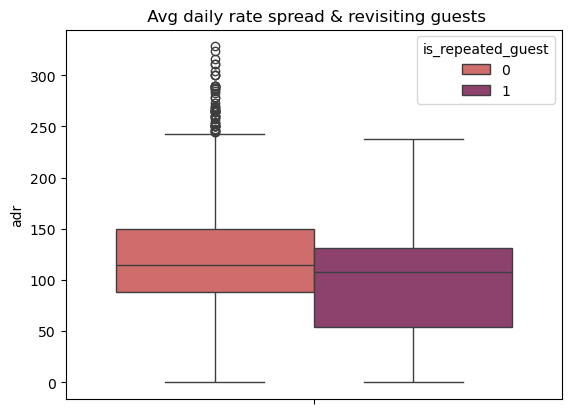

In [449]:
sns.boxplot(y=df['adr'],hue=df['is_repeated_guest'],palette='flare')
plt.title(' Avg daily rate spread & revisiting guests')
plt.show()

In [248]:
# Revisting guests & their lead time
df_ll.groupby(['lead_time'])[['hotel']].count()

,hotel
lead_time,
0,13
1,2
23,1
31,1
49,1
116,1


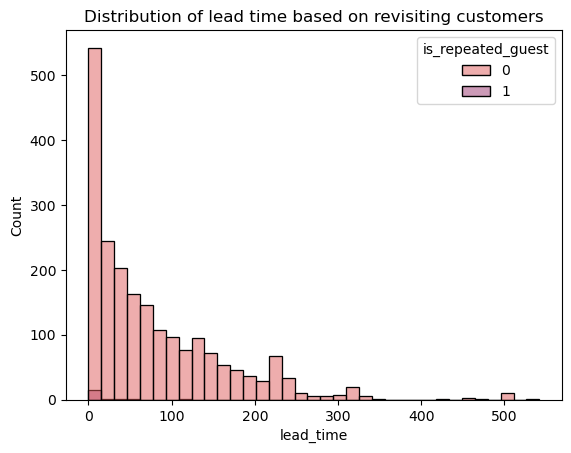

In [451]:
sns.histplot(x=df['lead_time'],hue=df['is_repeated_guest'],palette='flare')
plt.title('Distribution of lead time based on revisiting customers')
plt.show()
# agents, customer type, adr doesnt do much for repeated guests; in fact rate isnt in outlier for revisiting guests
#not much factors that influence revisit
#gradual inc in number of repeated customers

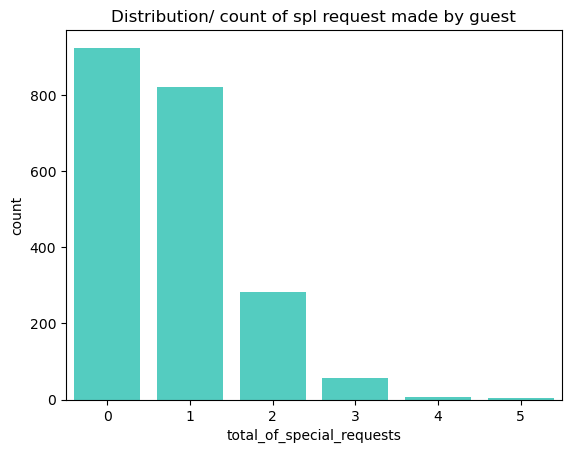

In [456]:
#1a
sns.countplot(x=df['total_of_special_requests'],color='turquoise')
plt.title('Distribution/ count of spl request made by guest')
plt.show()

<Axes: xlabel='required_car_parking_spaces', ylabel='count'>

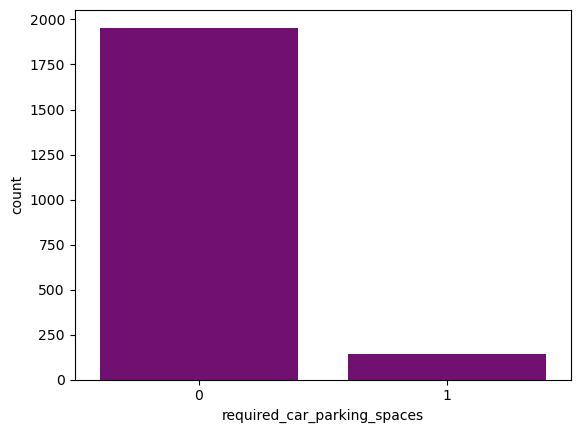

In [340]:
#1a
sns.countplot(x=df['required_car_parking_spaces'],color='purple')
plt.title(' Parking space requested by guest')
plt.show()
# More than one third of guest doesnt make any spl request while almost half of customers make 1 to 2 request; Small amount of people make 4 to 5 requst
# Very few request for parking, implying most guest dont drive in

ii) Relation between special request & avg daily rate; Room preferences made

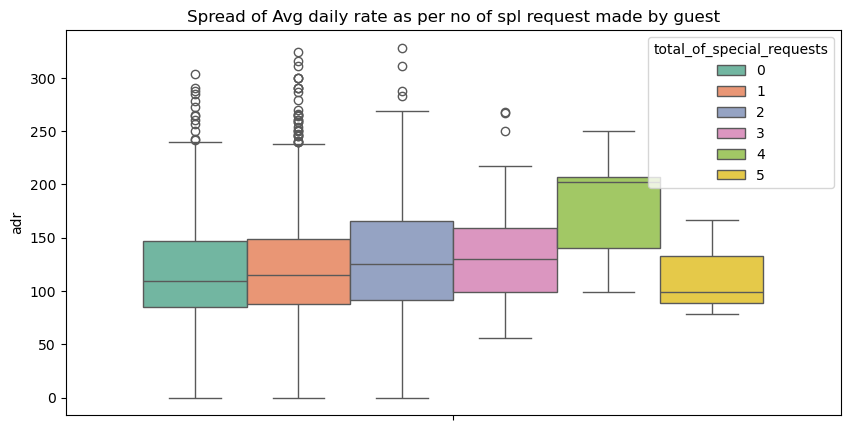

In [282]:
#1b
fig,ax=plt.subplots(1,figsize=(10,5))
sns.boxplot(y=df['adr'],hue=df['total_of_special_requests'],palette='Set2')
plt.title('Spread of Avg daily rate as per no of spl request made by guest')
plt.show()

In [284]:
# guest preferred room & their assigned rooms
df.groupby(['reserved_room_type','assigned_room_type'])[['adr']].mean()

adr
reserved_room_type assigned_room_type            
A                  A                   102.443662
                   B                   106.910417
                   C                   120.885625
                   D                    92.671605
                   E                   103.618000
                   F                   123.131333
                   G                   124.620000
                   I                    66.503333
                   K                    74.480000
B                  B                   104.705000
C                  C                   167.720500
                   I                   205.776667
D                  A                   127.724167
                   D                   135.494156
                   E                   111.850000
                   F                   134.200000
                   G                   173.105000
                   K                    33.500000
E                  A                   146.000000
                   D                   119.970000
                   E                   157.068759
                   F                   123.740000
                   G                   149.614286
F                  E                    95.400000
                   F                   180.615047
                   G                   133.663333
G                  G                   198.686211
                   H                   144.500000
                   I                   288.000000
H                  H                   225.505714

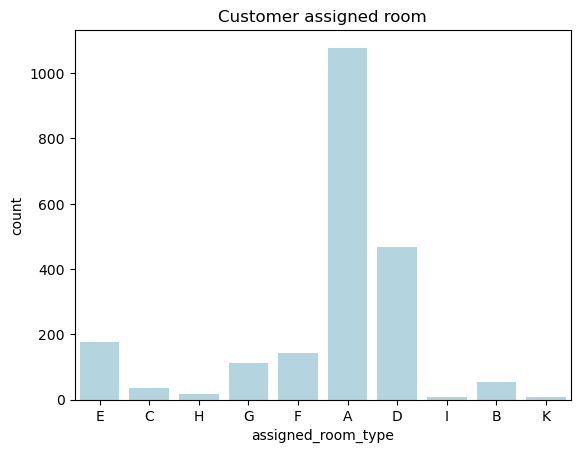

In [423]:
sns.countplot(x=df['assigned_room_type'],color='lightblue')
plt.title('Customer assigned room')
plt.show()

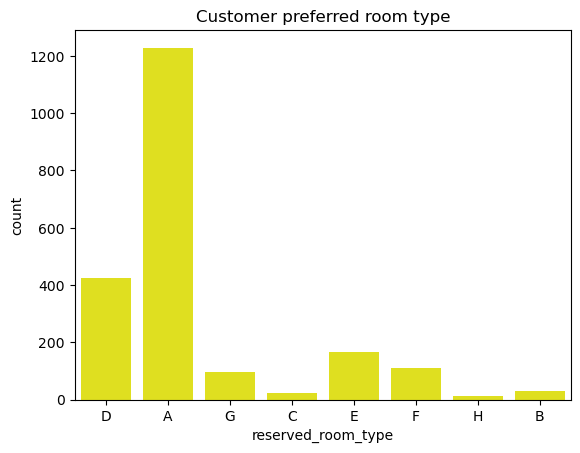

In [286]:
sns.countplot(x=df['reserved_room_type'],color='yellow')
plt.title('Customer preferred room type')
plt.show()
# Adr is high in cases for 0 to 2 special request made;
# Customers prefer room A & D; Most cases hotel doesnt assign the requested rooms

In [464]:
#2a
mrkt_amount=df.groupby(['market_segment'])[['amount','adr']].mean()
mrkt_amount

,amount,adr
market_segment,,
Aviation,770.000000,110.000000
Complementary,237.000000,79.000000
Corporate,286.328276,102.653793
Direct,385.209943,140.956420
Groups,249.147727,82.379545
Offline TA/TO,303.622069,92.435172
Online TA,338.766583,125.855901


In [466]:
dstb_amount=df.groupby(['distribution_channel'])[['amount','adr']].mean()
dstb_amount

,amount,adr
distribution_channel,,
Corporate,312.672000,103.913143
Direct,384.503989,139.988348
GDS,315.276818,136.946818
TA/TO,329.061095,119.673801


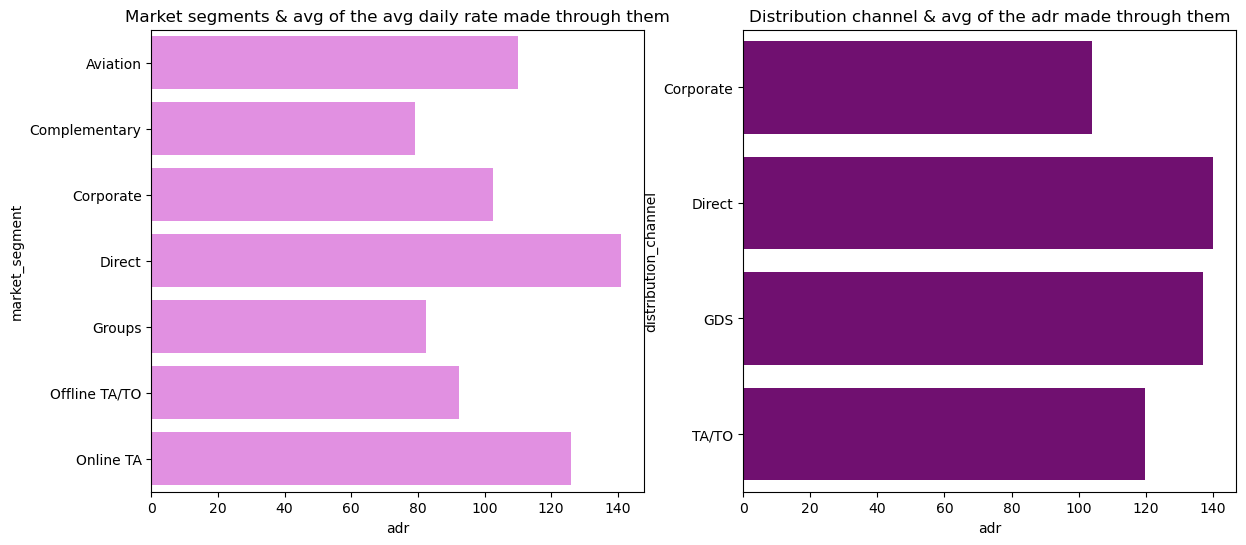

In [468]:
fig,ax=plt.subplots(1,2,figsize=(14,6))
sns.barplot(y=mrkt_amount.index,x=mrkt_amount['adr'],color='violet',ax=ax[0])
ax[0].set_title('Market segments & avg of the avg daily rate made through them')
sns.barplot(y=dstb_amount.index,x=dstb_amount['adr'],color='purple',ax=ax[1])
ax[1].set_title('Distribution channel & avg of the adr made through them')
plt.show()
# direct & online customers books with high average adr
# even distribution channel also, direct guest pay high adr to hotel

ii) Amenities/ service bring highest Avg daily rate

In [318]:
# MAx adr from meal type
meal_max=df.groupby(['meal'])[['adr']].max()
meal_max

,adr
meal,
BB,328.33
HB,288.00
SC,190.00
Undefined,311.00


In [320]:
room_max=df.groupby(['assigned_room_type'])[['adr']].max()
room_max

,adr
assigned_room_type,
A,268.00
B,229.00
C,269.00
D,250.00
E,266.20
F,287.00
G,324.00
H,328.33
I,288.00


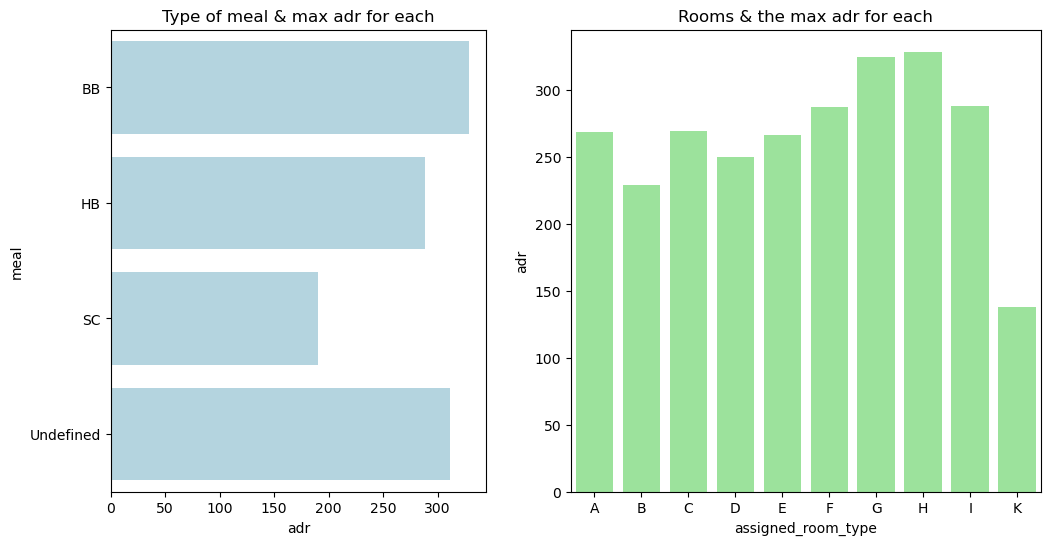

In [324]:
fig,ax=plt.subplots(1,2,figsize=(12,6),gridspec_kw={'width_ratios':(0.40,0.50)})
sns.barplot(y=meal_max.index,x=meal_max['adr'],color='lightblue',ax=ax[0])
ax[0].set_title('Type of meal & max adr for each')
sns.barplot(x=room_max.index,y=room_max['adr'],color='lightgreen',ax=ax[1])
ax[1].set_title('Rooms & the max adr for each')
plt.show()
# AMximun adr is apid for BB type meal
# maximum adr is paid for room H then followed by G

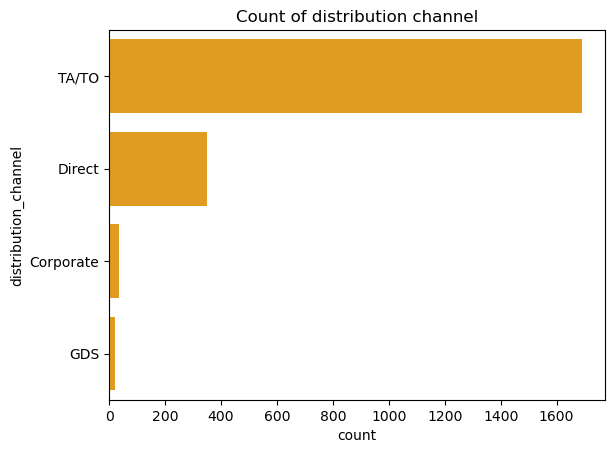

In [328]:
#2c
sns.countplot(df['distribution_channel'],color='orange')
plt.title('Count of distribution channel')
plt.show()
# Travel agent or tourist operator bring high number of customers to hotel